# Step 0: Installation

In [ ]:
%pip install struct-bias

Note: BIAS makes use of several R-packages, so R needs to be installed on your system to run BIAS.

The required packages will be installed automatically when loading BIAS, so the first time importing can take some time

In [ ]:
from BIAS import BIAS

# Step 1: Run algorithm on f0

The first part to detecting structural bias is to run our algorithm on f0 and record the final solution found. 

For this tutorial, we will make use of scipy's optimize module, starting with Differential Evolution. We need to define our boundaries ([0,1]^d) and number of repetitions (which should be in {30,50,100,600} to be able to use the BIAS functionality)

In [30]:
#Run our algorithm on f0
from scipy.optimize import differential_evolution
import numpy as np
from BIAS import f0

bounds = 30*[(0,1)]
samples_de = []
print("Performing optimization method 100 times on f0.")
for i in np.arange(100):
    result = differential_evolution(f0, bounds, maxiter=10)
    samples_de.append(result.x)

samples_de = np.array(samples_de)

Performing optimization method 100 times on f0.


# Step 2: Predicting presence and type of structural bias

To use BIAS, simply instantiate an object of the BIAS class and call the 'predict' method. This should be given the final postitions on f0 as a numpy array. We can optionally specify the used alpha value (0.01 or 0.05 are supported) and multiple test correction method, altough this is set to the value we found to achieve the optimal balance between false negative and false positive ratios through extensive testing.

In [31]:
#Run the BIAS toolbox
test = BIAS()
tests, result = test.predict(samples_de, show_figure=False)

Running SB calculation with 30-dimensional data of sample size 100 (alpha = 0.01)
No clear evidence of bias detected


This call to predict returns the individual test results as well, which are able to be viewed as a regular pandas dataframe

In [34]:
tests

,1-spacing,2-spacing,3-spacing,ad,ad_transform,shapiro,jb,ddst,kurtosis,mmpd_min,...,Moran,Cressie1,Cressie2,Vasicek,Swartz,Morales,Pardo,Marhuenda,Zhang1,Zhang2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The predict function also has the ability to visualize the results, which combines the positions and the test-results. This can be done by setting the 'show_figure' argument to True. The figure can be saved by using the 'filename' argument. 

Running SB calculation with 30-dimensional data of sample size 100 (alpha = 0.01)


set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


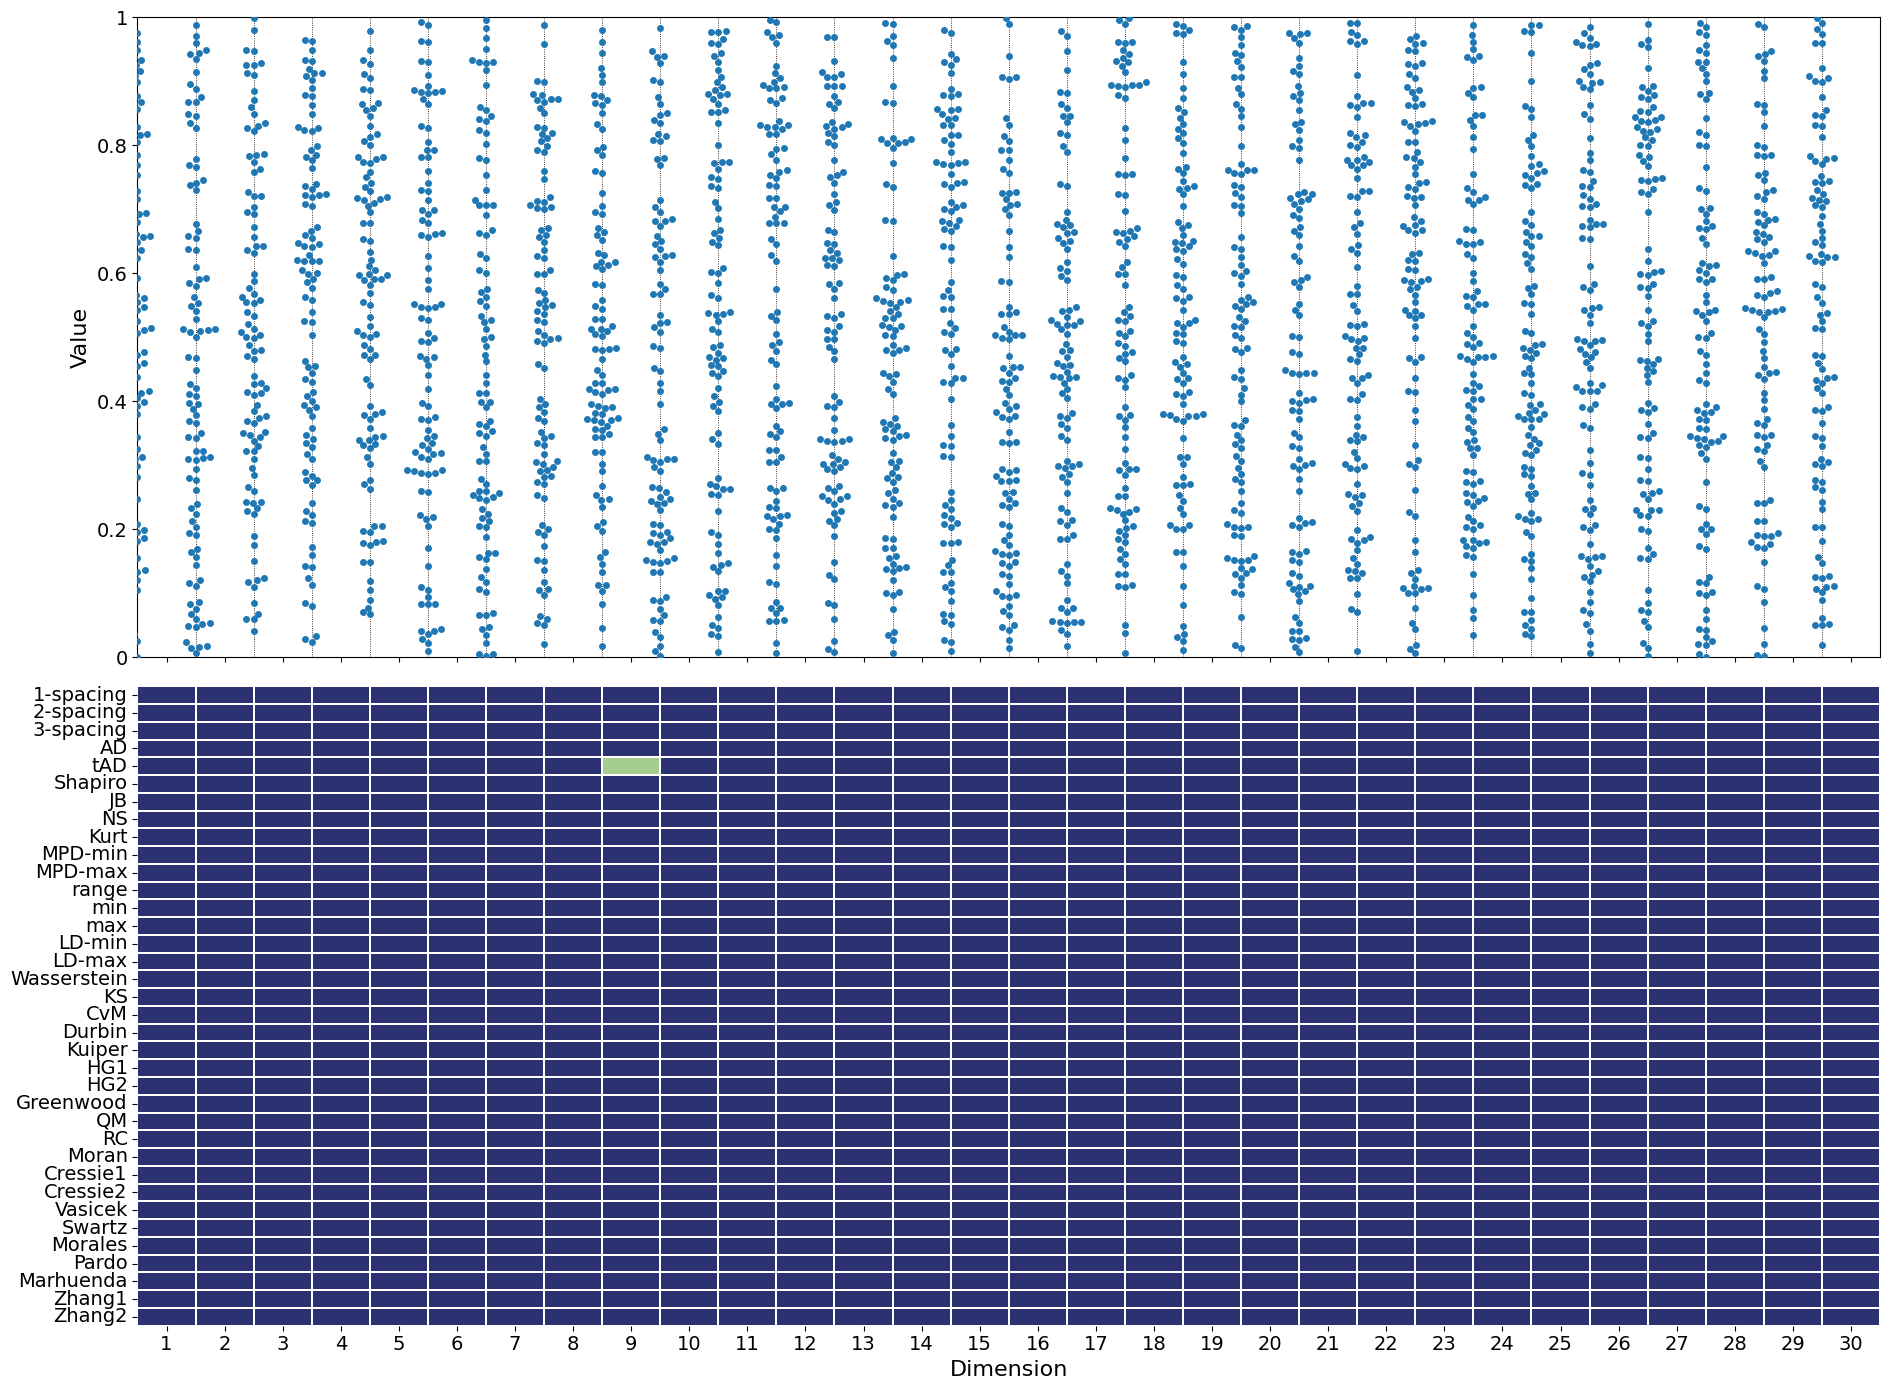

No clear evidence of bias detected


In [35]:
_, _ = test.predict(samples_de, show_figure=True)

# Step 3: explaining predictions using Deep-BIAS

In addition to the regular BIAS based on statistical testing, we provide acces to the Deep-BIAS predictions, which have the additional benefit that they can show a per-dimension overview of why the neural network predicts a certain type of bias. 
This can be accessed from the same BIAS-object, using the 'precict_deep' method to get the predictions, and the 'explain' method to plot the explainations.

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


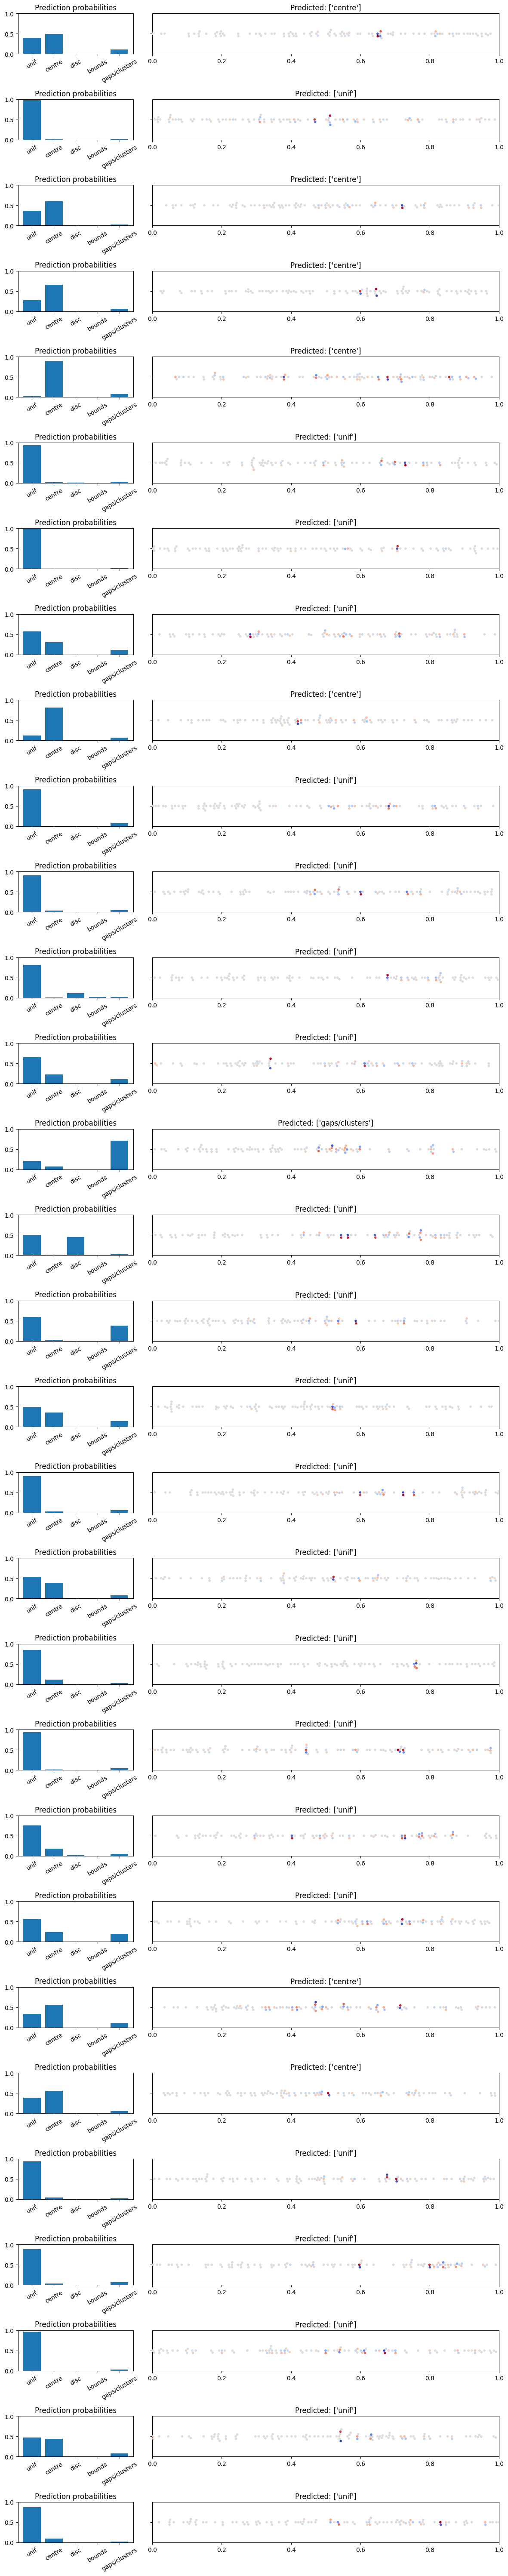

In [36]:
#Run the Deep-BIAS method and show the explainations
y, preds = test.predict_deep(samples_de)
test.explain(samples_de, preds)

# Further example: initialization of BFGS

What follows is an example showing how initialization of BFGS impact the detection of structural bias

In [27]:
#Run two versions of a different algorithm
from scipy.optimize import fmin_bfgs

samples_bfgs = []
print("Performing optimization method 100 times on f0.")
for i in np.arange(50):
    result = fmin_bfgs(f0, x0=np.ones(30)/2, maxiter=100, full_output=False, disp=False)
    samples_bfgs.append(result)

samples_bfgs = np.array(samples_bfgs)

samples_bfgs2 = []
print("Performing optimization method 100 times on f0.")
for i in np.arange(50):
    result = fmin_bfgs(f0, x0=np.random.uniform(0,1,30), maxiter=100, full_output=False, disp=False)
    samples_bfgs2.append(result)

samples_bfgs2 = np.array(samples_bfgs2)

Performing optimization method 100 times on f0.
Performing optimization method 100 times on f0.


Running SB calculation with 30-dimensional data of sample size 50 (alpha = 0.01)


24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
18.0% of the points cannot be placed; you may want to d

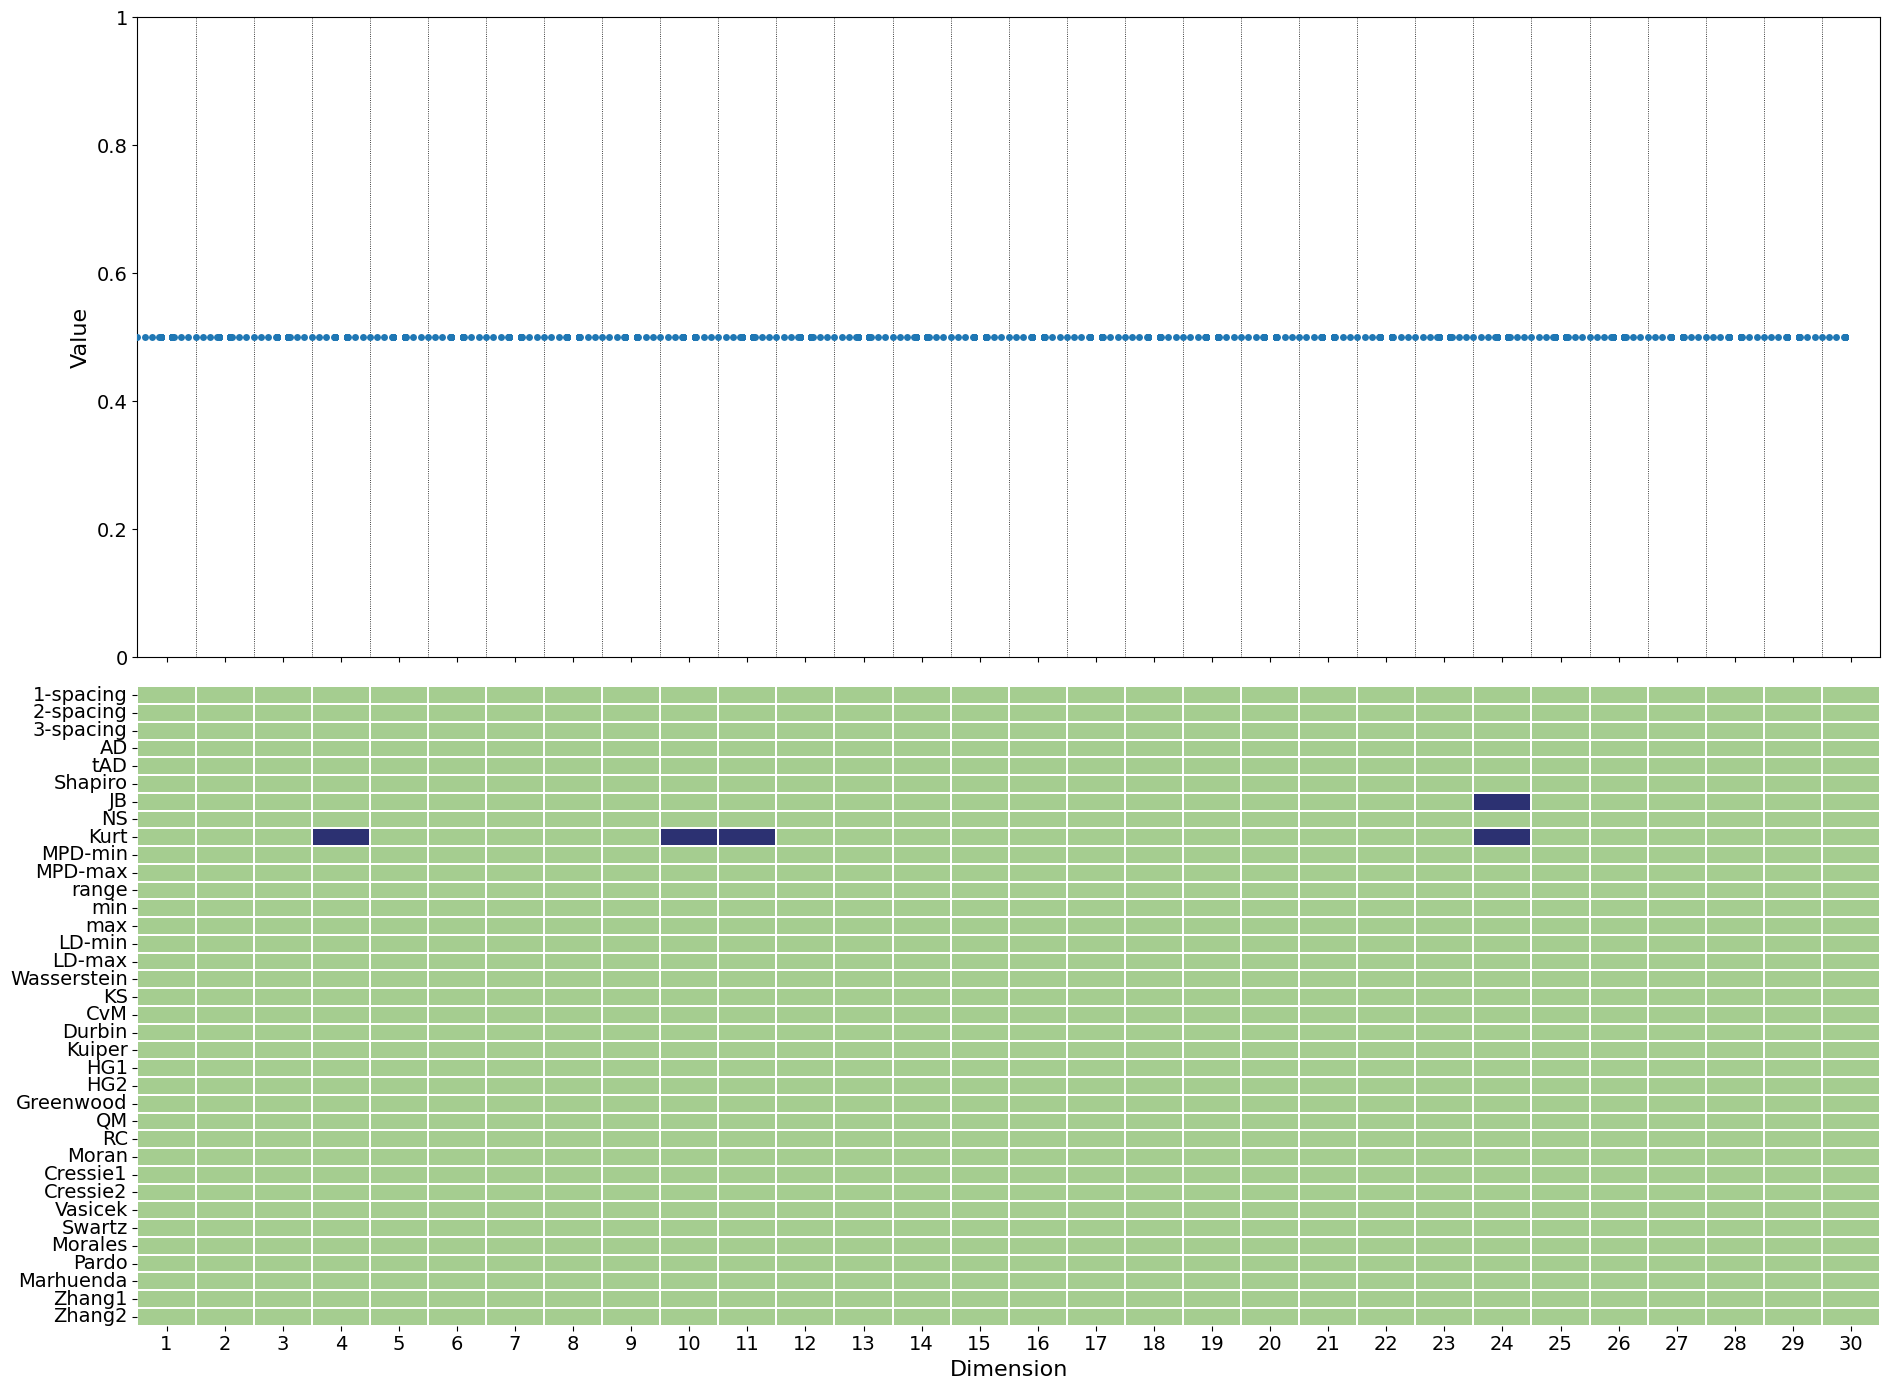

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Detected bias which seems to be related to ['Clusters'] (0.67 probability).The rejections seems to be most similar to the ['clusters'] scenario (0.47 probability).
(    1-spacing  2-spacing  3-spacing    ad  ad_transform  shapiro     jb  ddst  \
0        True       True       True  True          True     True   True  True   
1        True       True       True  True          True     True   True  True   
2        True       True       True  True          True     True   True  True   
3        True       True       True  True          True     True   True  True   
4        True       True       True  True          True     True   True  True   
5        True       True       True  True          True     True   True  True   
6        True       True       True  True          True     True   True  True   
7        True       True       True  True          True     True   True  True   
8        True       True       True  True          True     True   True  True   
9        True       True 

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


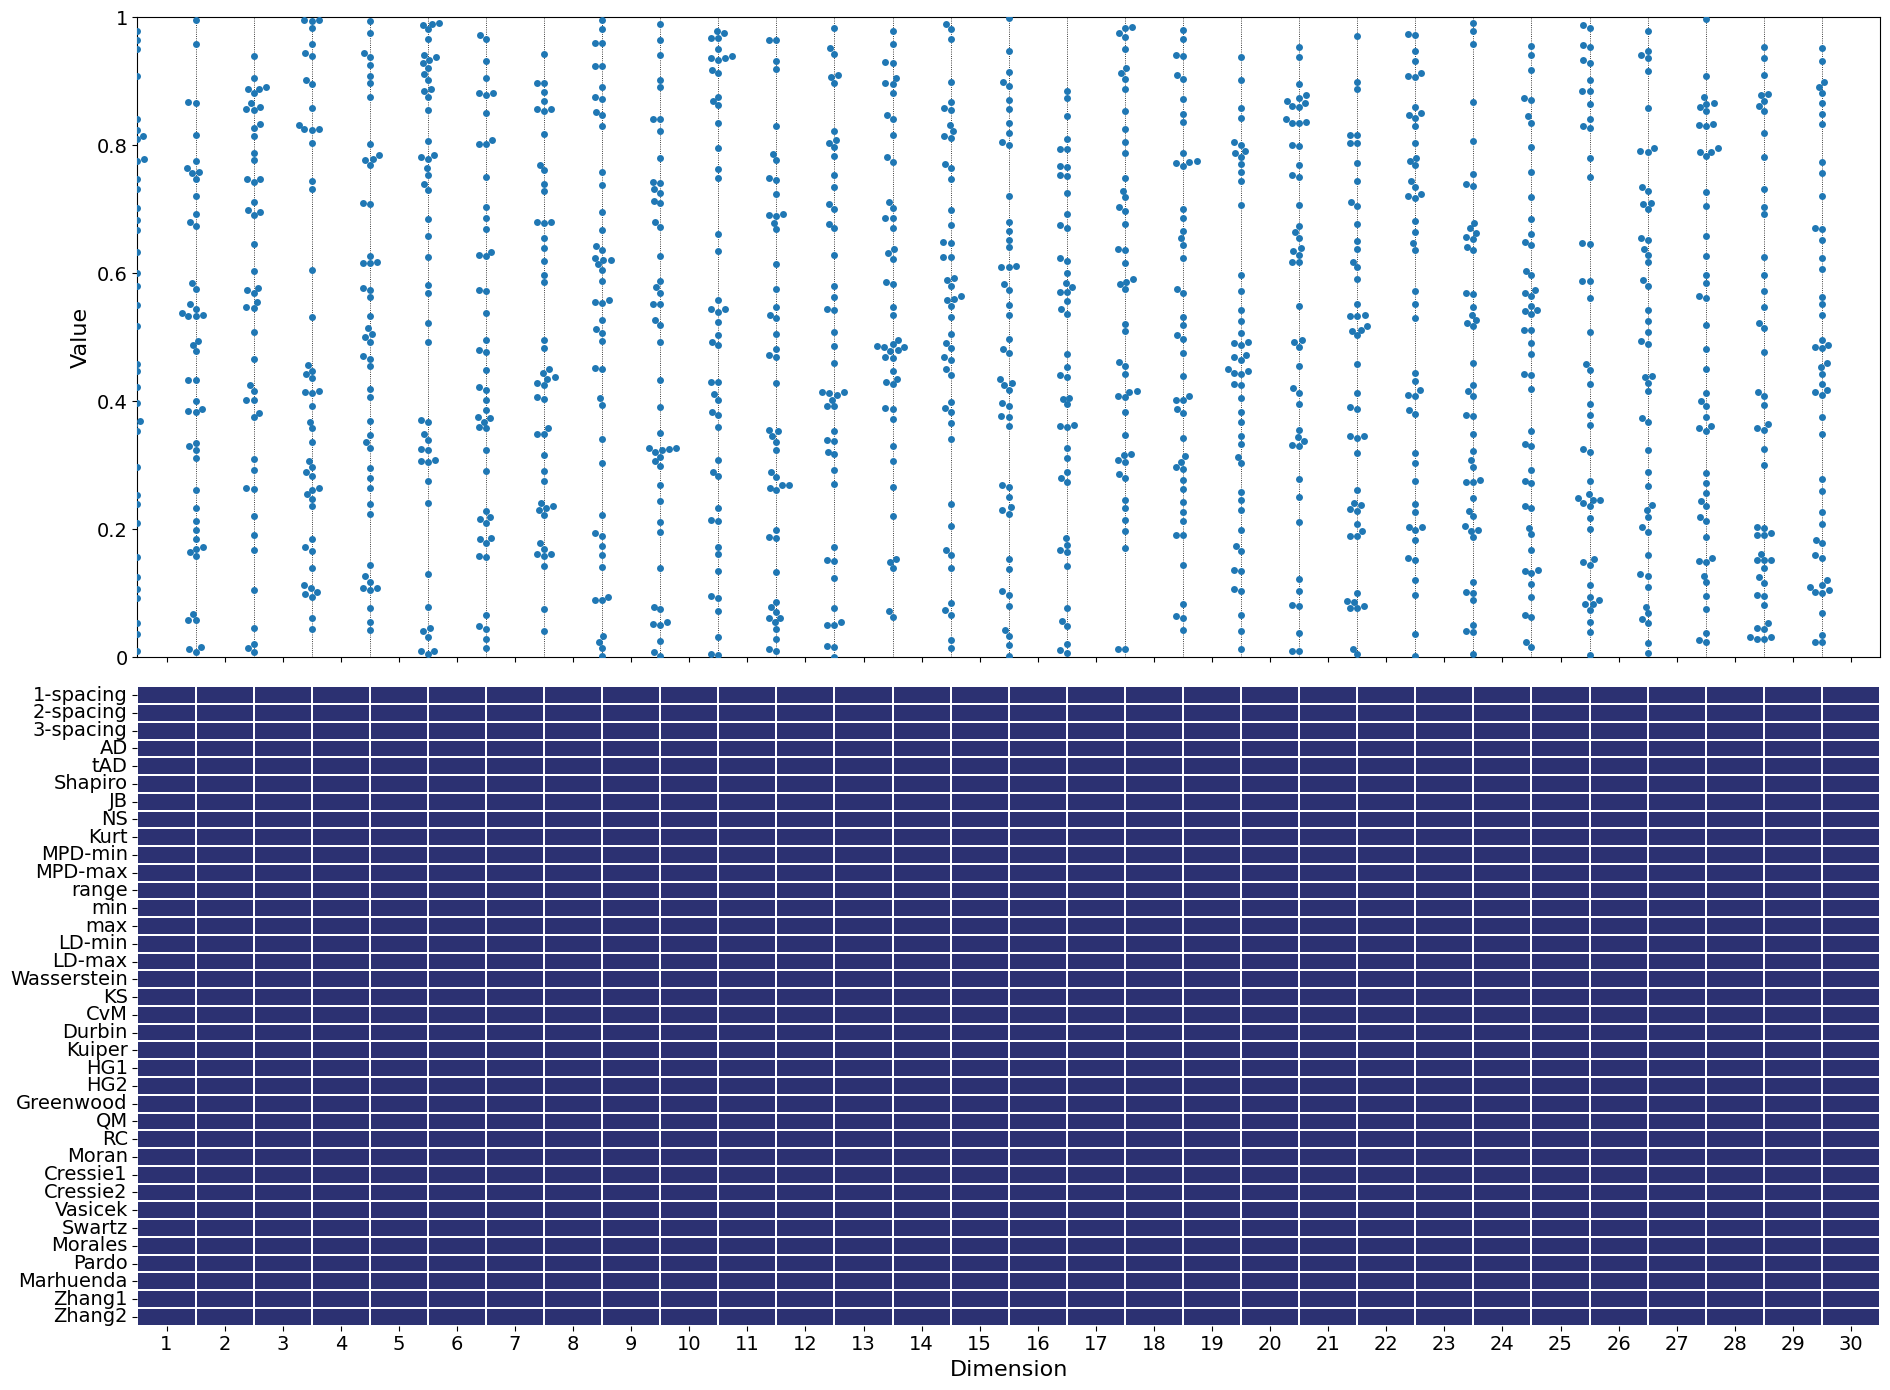

No clear evidence of bias detected
(    1-spacing  2-spacing  3-spacing     ad  ad_transform  shapiro     jb  \
0       False      False      False  False         False    False  False   
1       False      False      False  False         False    False  False   
2       False      False      False  False         False    False  False   
3       False      False      False  False         False    False  False   
4       False      False      False  False         False    False  False   
5       False      False      False  False         False    False  False   
6       False      False      False  False         False    False  False   
7       False      False      False  False         False    False  False   
8       False      False      False  False         False    False  False   
9       False      False      False  False         False    False  False   
10      False      False      False  False         False    False  False   
11      False      False      False  False         F

In [28]:
#Run the BIAS toolbox
test = BIAS()
print(test.predict(samples_bfgs, show_figure=True))
print(test.predict(samples_bfgs2, show_figure=True))

# Last example: using nevergrad algorithms

It is straighforward to run BIAS on any algorithm, as long as we can pass in an objective function (f0) and its bounds. For example, this is how we can test Nevergrads PSO algorithm:

In [7]:
import nevergrad as ng
import nevergrad.common.typing as tp

from nevergrad.optimization.optimizerlib import (
    PSO
)


In [13]:
param = ng.p.Array(shape=(30,)).set_bounds(0,1)

Bounds are 1.0 sigma away from each other at the closest, you should aim for at least 3 for better quality.


In [16]:
res = PSO(param, budget=1000).minimize(f0)

In [19]:
samples_pso = []
dim = 10
param = ng.p.Array(shape=(dim,)).set_bounds(0,1)
for i in np.arange(30):
    res = PSO(param, budget=1000).minimize(f0)
    samples_pso.append(res.value)

samples_pso = np.array(samples_pso)

Bounds are 1.0 sigma away from each other at the closest, you should aim for at least 3 for better quality.


Running SB calculation with 10-dimensional data of sample size 30 (alpha = 0.01)


invalid value encountered in subtract
set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


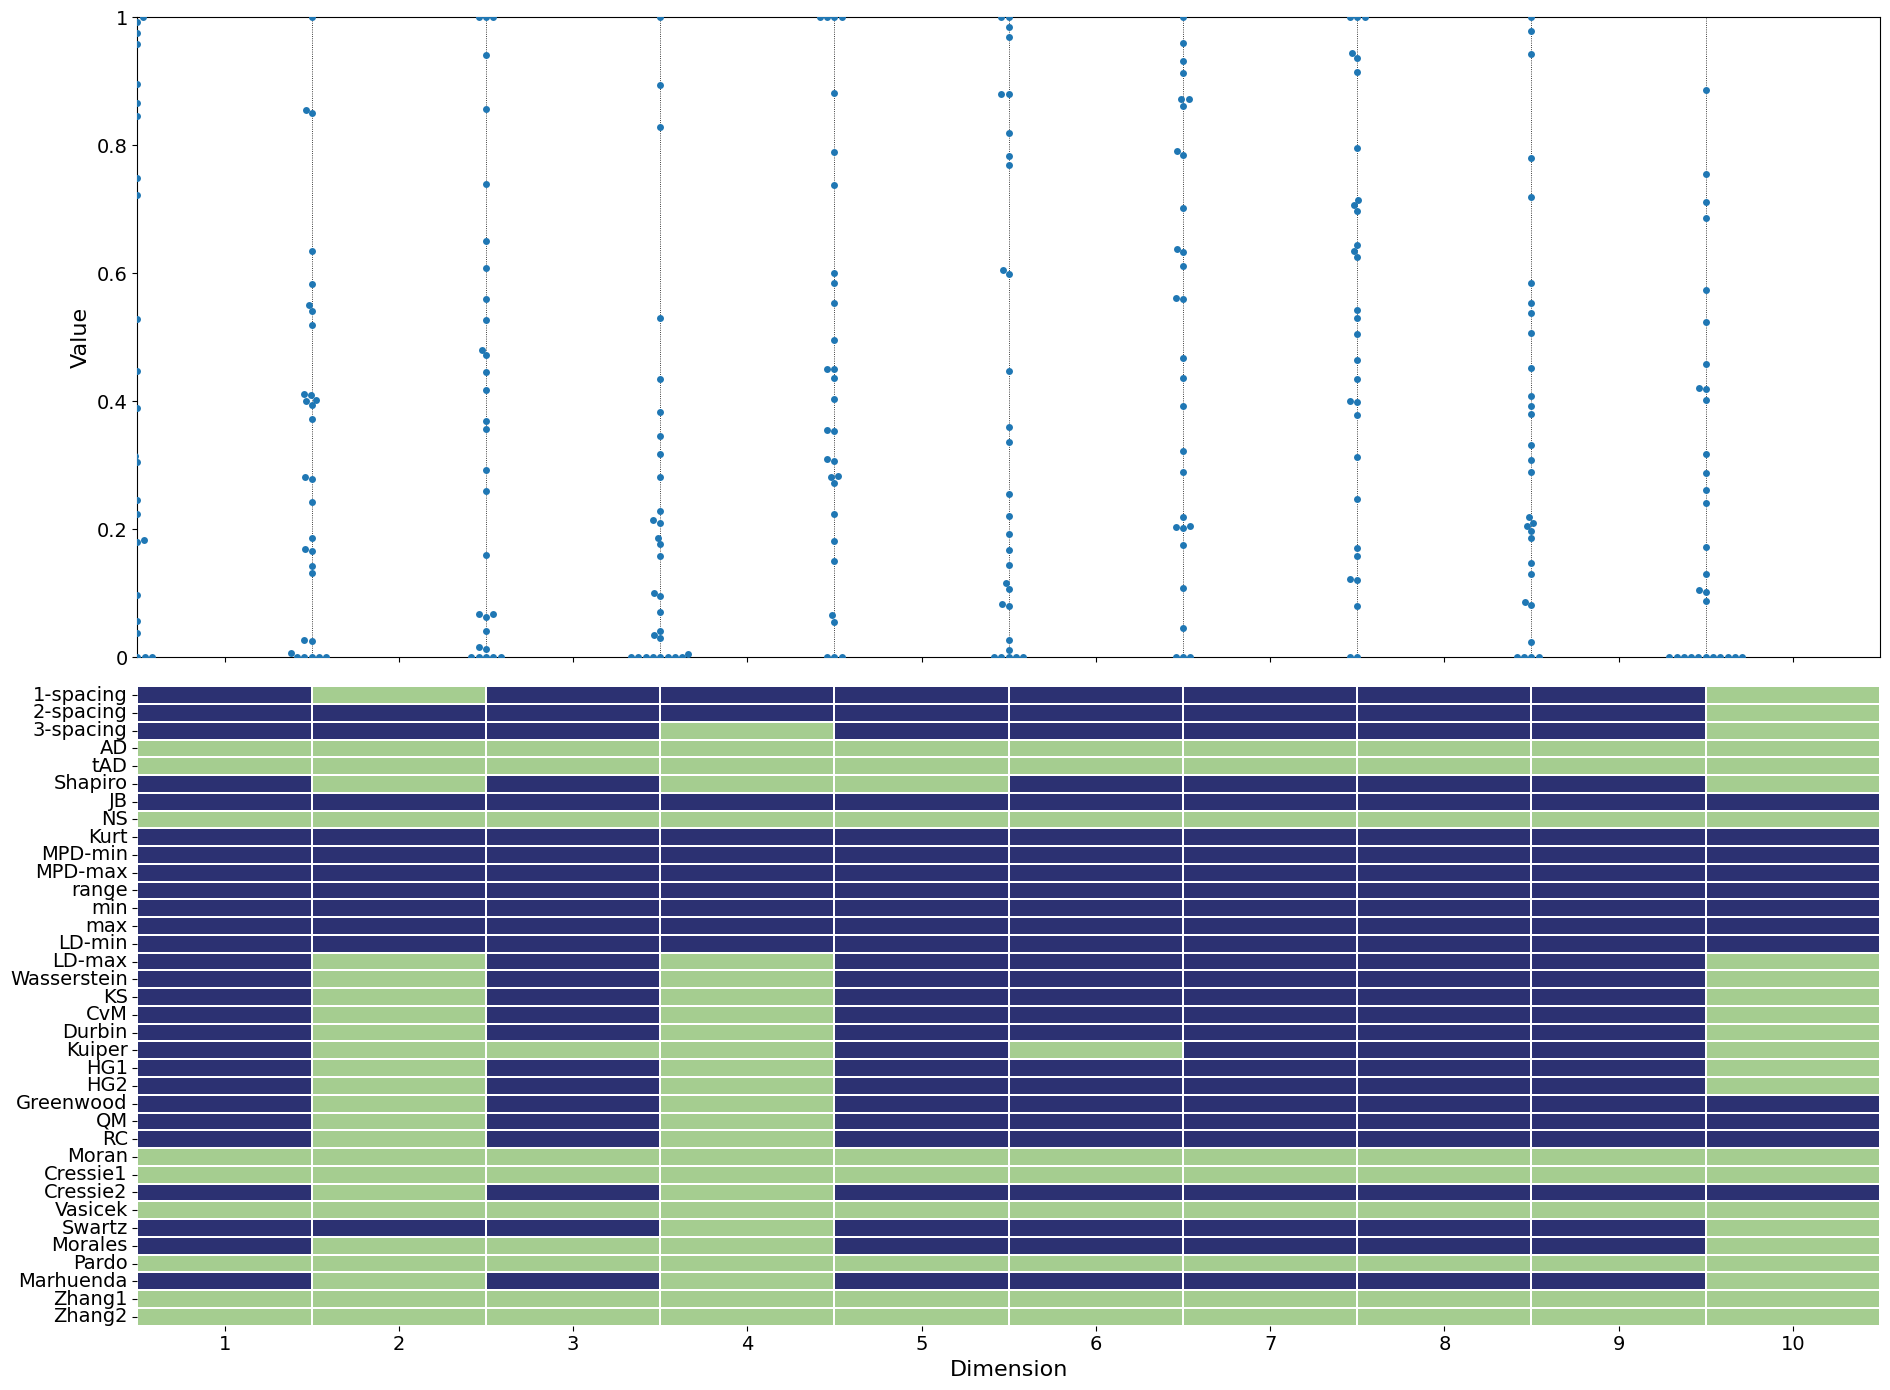

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Detected bias which seems to be related to ['Bounds'] (0.60 probability).The rejections seems to be most similar to the ['inv_cauchy'] scenario (0.39 probability).
(   1-spacing  2-spacing  3-spacing    ad  ad_transform  shapiro     jb  ddst  \
0      False      False      False  True          True    False  False  True   
1       True      False      False  True          True     True  False  True   
2      False      False      False  True          True    False  False  True   
3      False      False       True  True          True     True  False  True   
4      False      False      False  True          True     True  False  True   
5      False      False      False  True          True    False  False  True   
6      False      False      False  True          True    False  False  True   
7      False      False      False  True          True    False  False  True   
8      False      False      False  True          True    False  False  True   
9       True       True       True 

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [20]:
print(test.predict(samples_pso, show_figure=True))